In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# plot the DATA!

In [2]:
def plotIndividual(df, ax, o, var1):
    import seaborn as sns
    sns.set(font_scale=2)
    
#     if Exp == 'haltere_loading':
#         order = ['intacthalteres', 'loadedhaltere1', 'loadedhaltere2', 'loadedhaltere3', 'removedload']
#     else:
#         order = ['cutwing5', 'cutwing4', 'cutwing3',  'cutwing2', 'cutwing1', 'intactwings']

    g = sns.boxplot(x=var1, y="amplitude", hue="body", data=df, 
                    order=o,
                    fliersize=0,
                    **boxplot_kwargs,
                    ax = ax
                    )
    g = sns.stripplot(x=var1, y="amplitude", hue="body", data=df, 
                  dodge=True,
                  order=o,
                  ax = ax,
                  **stripplot_kwargs)
                  
    g.set(xlabel='', ylabel='Amplitude (degree)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [3]:
pal = {'left wing': '#b8e186', #light green
       'right wing': '#4dac26', #dark green
       'left haltere': '#fdb863', #light brown
       'right haltere': '#e66101' #dark brown
      }

boxprops = {'edgecolor': 'k', 'linewidth': 2,'alpha': 0.5}
lineprops = {'color': 'k', 'linewidth': 2}
capprops = {'linewidth': 0}

# Set up some general kwargs that we'll use in both the stripplot and boxplot
kwargs = {'palette': pal, 'hue_order': ['left wing', 'right wing', 'left haltere', 'right haltere']}

# The boxplot kwargs get passed to matplotlib's boxplot function.
# Note how we can re-use our lineprops dict to make sure all the lines
# match. You could also edit each line type (e.g. whiskers, caps, etc)
# separately.
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': capprops,
                       'width': 0.75},
                      **kwargs)
stripplot_kwargs = dict({'linewidth': 0.6, 'size': 6, 'alpha': 0.7},
                        **kwargs)

## haltere loading

In [4]:
Exp = 'haltere_loading'

In [5]:
am_list = glob.glob('../dataFolder/AmplitudeAnalysis/v2/' + Exp + '/fly*_AmpDataCompiled.csv')

In [6]:
df = pd.read_csv(am_list[0])
df.head()

,Unnamed: 0,body,amplitude,flyID,experiment,treatment
0,0,LW,160.891691,fly1,halLoad,intacthalteres
1,1,LW,156.949047,fly1,halLoad,intacthalteres
2,2,LW,157.513086,fly1,halLoad,intacthalteres
3,3,LW,156.536839,fly1,halLoad,intacthalteres
4,4,LW,163.698372,fly1,halLoad,intacthalteres


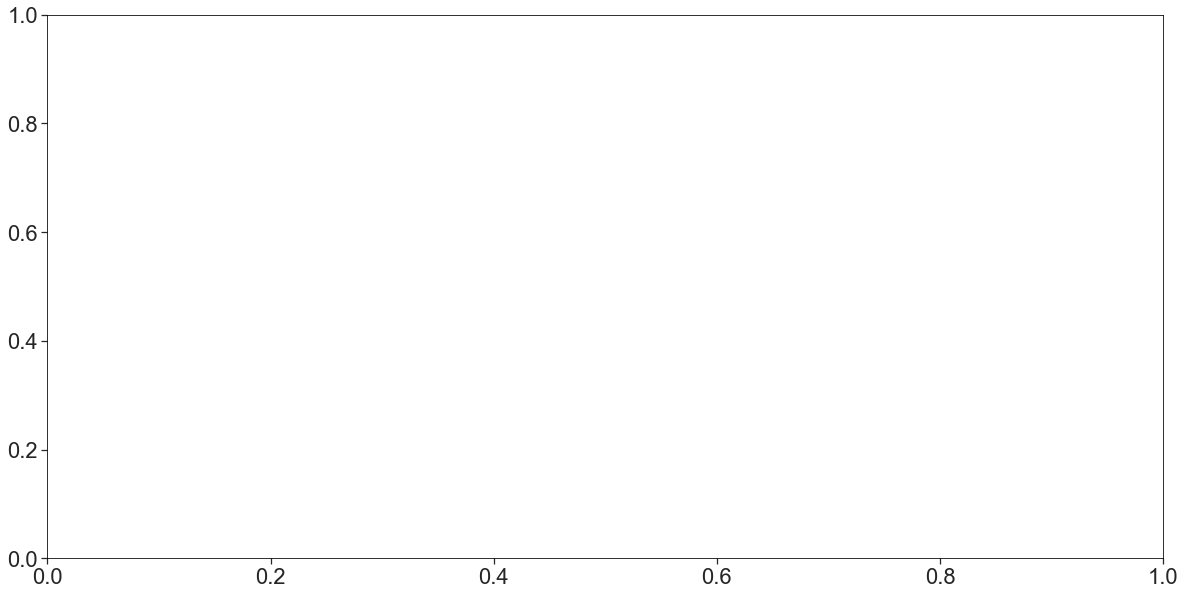

In [7]:
fig, ax = plt.subplots(figsize = (20, 10))

for f in am_list:
    df = pd.read_csv(f)
    flyID, _ = os.path.basename(f).split('_', 1)
    
    df['body'] = df['body'].replace({'LW':'left wing',
                    'RW':'right wing',
                   'LH': 'left haltere',
                   'RH': 'right haltere'})
    order = ['intacthalteres', 'loadedhaltere1', 'loadedhaltere2', 'loadedhaltere3', 'removedload']
    plotIndividual(df, ax, order, 'treatment')
    fig.savefig('../dataFolder/Figure/AmplitudeAnalysis/v2/' + Exp + '/IndividualAmpltitude_' + flyID + '.pdf',
                bbox_inches = 'tight')
    ax.clear()

## Epi ridge data

In [8]:
Exp = 'epi_ridge_cut'
am_list = glob.glob('../dataFolder/AmplitudeAnalysis/v2/' + Exp + '/fly*_AmpDataCompiled.csv')

In [9]:
df = pd.read_csv(am_list[0])
df.head()

,Unnamed: 0,Unnamed: 0.1,body,amplitude,flyID,experiment,treatment,winglength
0,0,0,LW,123.878042,fly1,epi,cutwing1,0.82
1,1,1,LW,130.424716,fly1,epi,cutwing1,0.82
2,2,2,LW,129.254658,fly1,epi,cutwing1,0.82
3,3,3,LW,129.843487,fly1,epi,cutwing1,0.82
4,4,4,LW,120.911644,fly1,epi,cutwing1,0.82


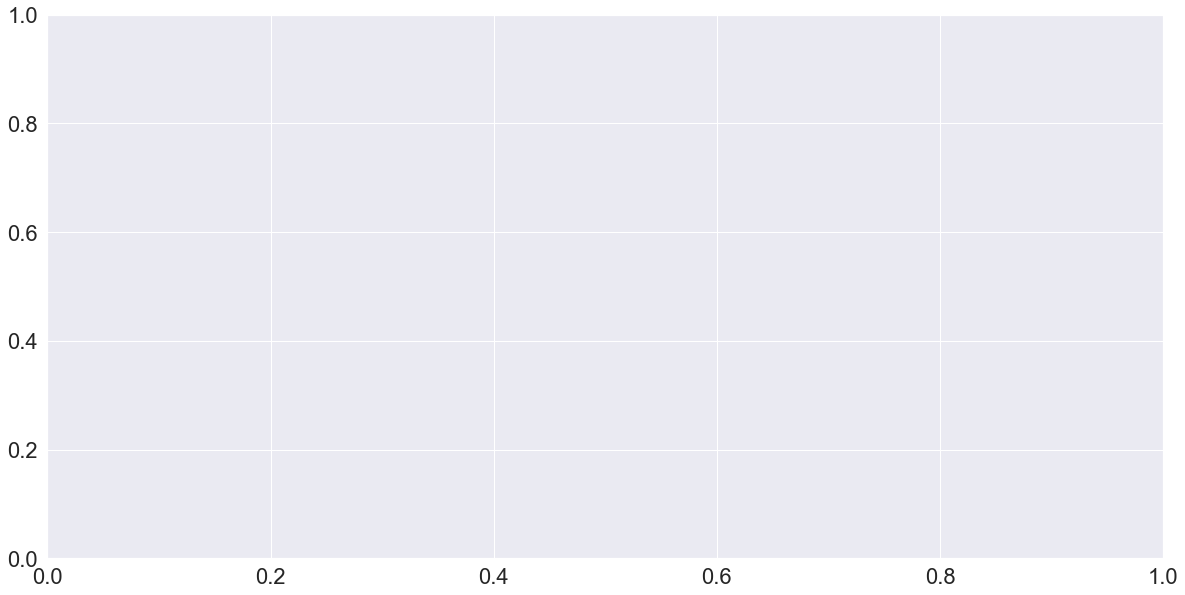

In [10]:
fig, ax = plt.subplots(figsize = (20, 10))

for f in am_list:
    df = pd.read_csv(f)
    flyID, _ = os.path.basename(f).split('_', 1)
    
    df['body'] = df['body'].replace({'LW':'left wing',
                    'RW':'right wing',
                   'LH': 'left haltere',
                   'RH': 'right haltere'})
      
    order = sorted(df.winglength.unique())
    plotIndividual(df, ax, order, 'winglength')
    fig.savefig('../dataFolder/Figure/AmplitudeAnalysis/v2/' + Exp + '/IndividualAmpltitude_' + flyID + '.pdf',
               bbox_inches = 'tight')
    ax.clear()

## Slit Sc

In [11]:
Exp = 'Slit_sc'
am_list = glob.glob('../dataFolder/AmplitudeAnalysis/v2/' + Exp + '/fly*_AmpDataCompiled.csv')

In [12]:
df = pd.read_csv(am_list[0])
df.head()

,Unnamed: 0,Unnamed: 0.1,body,amplitude,flyID,experiment,treatment,winglength
0,0,0,LW,165.147680,fly1,sc,cutwing1,0.719372
1,1,1,LW,175.922602,fly1,sc,cutwing1,0.719372
2,2,2,LW,177.831563,fly1,sc,cutwing1,0.719372
3,3,3,LW,166.982474,fly1,sc,cutwing1,0.719372
4,4,4,LW,147.339696,fly1,sc,cutwing1,0.719372


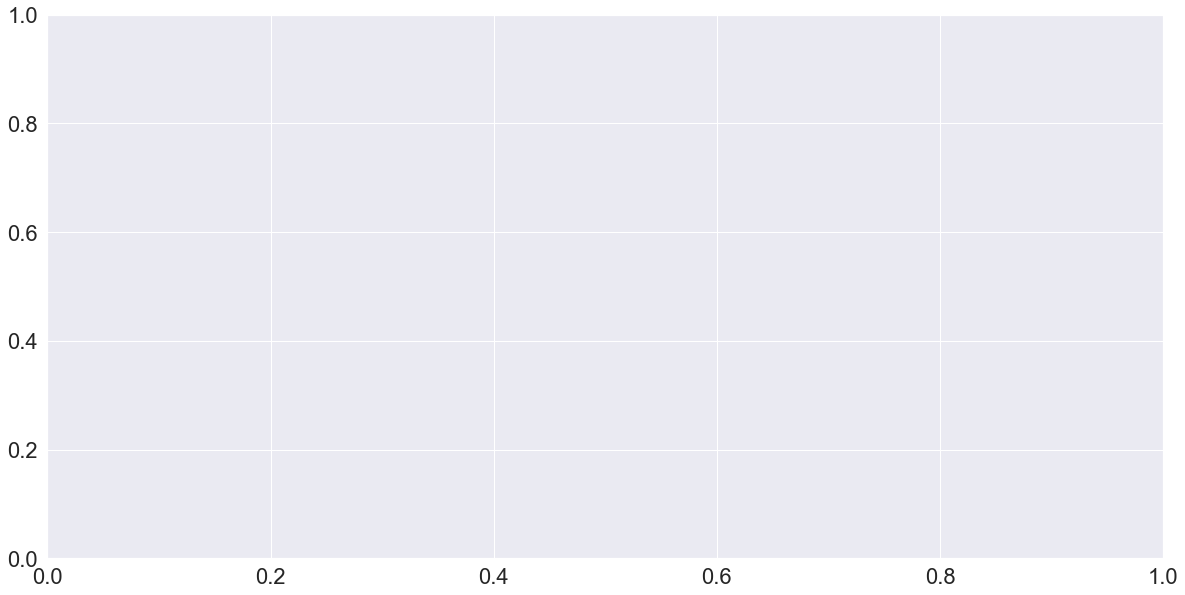

In [13]:
fig, ax = plt.subplots(figsize = (20, 10))

for f in am_list:
    df = pd.read_csv(f)
    flyID, _ = os.path.basename(f).split('_', 1)
    
    df['body'] = df['body'].replace({'LW':'left wing',
                    'RW':'right wing'})
      
    order = sorted(df.winglength.unique())
    plotIndividual(df, ax, order, 'winglength')
    fig.savefig('../dataFolder/Figure/AmplitudeAnalysis/v2/' + Exp + '/IndividualAmpltitude_' + flyID + '.pdf',
               bbox_inches = 'tight')
    ax.clear()

## asymmetric_wings

In [14]:
Exp = 'asymmetric_wings'
am_list = glob.glob('../dataFolder/AmplitudeAnalysis/v2/' + Exp + '/fly*_AmpDataCompiled.csv')

In [15]:
df = pd.read_csv(am_list[0])
df.head()

,Unnamed: 0,Unnamed: 0.1,body,amplitude,flyID,experiment,treatment,winglength
0,0,0,LW,124.826119,fly1,asym,cutwing1,0.821102
1,1,1,LW,124.222012,fly1,asym,cutwing1,0.821102
2,2,2,LW,130.476163,fly1,asym,cutwing1,0.821102
3,3,3,LW,124.713235,fly1,asym,cutwing1,0.821102
4,4,4,LW,124.917476,fly1,asym,cutwing1,0.821102


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1187: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1187: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


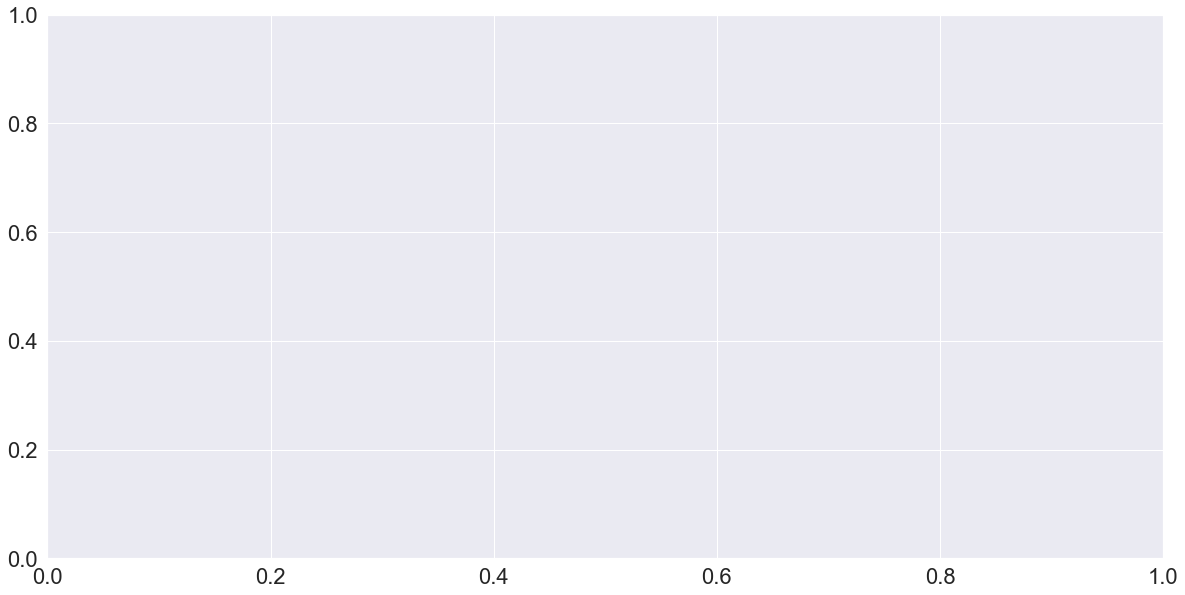

In [16]:
fig, ax = plt.subplots(figsize = (20, 10))

for f in am_list:
    df = pd.read_csv(f)
    flyID, _ = os.path.basename(f).split('_', 1)
    
    df['body'] = df['body'].replace({'LW':'left wing',
                    'RW':'right wing'})
      
    order = sorted(df.winglength.unique())
    plotIndividual(df, ax, order, 'winglength')
    fig.savefig('../dataFolder/Figure/AmplitudeAnalysis/v2/' + Exp + '/IndividualAmpltitude_' + flyID + '.pdf',
               bbox_inches = 'tight')
    ax.clear()